Лабораторна робота №2

1.	Завантажити датасет heart.csv

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files
import pandas as pd

In [2]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


2.	Зробити попередній аналіз і підготовку даних

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
df.duplicated().sum()

np.int64(3680)

In [6]:
df.drop_duplicates(inplace=True)
df.size

17160

In [7]:
TARGET = 'class'
FEATURES = [col for col in df.columns if col != TARGET]

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

print(f'Кількість категоріальних ознак: {len(cat_features)}')
print('Категоріальні ознаки:', cat_features, '\n')

print(f'Кількість числових ознак: {len(cont_features)}')
print('Числові ознаки:', cont_features, '\n')

Кількість категоріальних ознак: 7
Категоріальні ознаки: ['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'] 

Кількість числових ознак: 6
Числові ознаки: ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 



In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,60.587377,0.485606,576.135606,0.446970,37.881818,0.369697,263751.982189,1.356447,136.665909,0.645455,0.307576,132.678788,0.300758
std,11.913538,0.499982,970.630878,0.497368,11.572547,0.482906,106345.010143,0.998924,4.380990,0.478557,0.461665,77.779493,0.458761
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,115.000000,0.000000,30.000000,0.000000,208000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.300000,140.000000,1.000000,1.000000,206.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [9]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [10]:
df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


3.	Побудувати логістичну регресію

In [11]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [14]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Розмір y_test:", y_test.shape)
print("Розмір y_pred:", y_pred.shape)

if y_test.shape[0] == y_pred.shape[0]:
    print("Точність:", accuracy_score(y_test, y_pred))
    print("Звіт про класифікацію:\n", classification_report(y_test, y_pred))
else:
    print(f"Несумісність розмірів: y_test має {y_test.shape[0]} зразків, але y_pred має {y_pred.shape[0]} зразків.")

Розмір y_test: (264,)
Розмір y_pred: (264,)
Точність: 0.8409090909090909
Звіт про класифікацію:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



In [15]:
import numpy as np
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]

print(random_results)

      True Label  Predicted Label
797            0                0
330            0                0
56             0                0
693            0                0
450            0                0
889            1                1
216            0                0
1140           0                0
1729           0                0
521            0                0


In [16]:
TARGET = 'DEATH_EVENT'
X = df.drop(TARGET , axis =1 )
y = df[TARGET]

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state = 42, test_size =0.33, stratify=y)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T, 0)

print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)

X train size (12, 884)
X test size (12, 436)
y train size (1, 884)
y test size (1, 436)


4.	Побудувати графіки функції втрат і точності

In [19]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]

    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)
    accuracy = np.mean(predictions == y_train)
    return accuracy

In [21]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)

        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list, label='Cost', color='red')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title('Графік функції втрат')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(index, accuracy_list, label='Accuracy', color='blue')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.title('Графік точності')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return parameters, gradients, cost_list, accuracy_list

In [22]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # Ініціалізація
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Оновлення параметрів і отримання всіх значень
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Прогнозування
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Розрахунок точності
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    # Виведення точності
    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

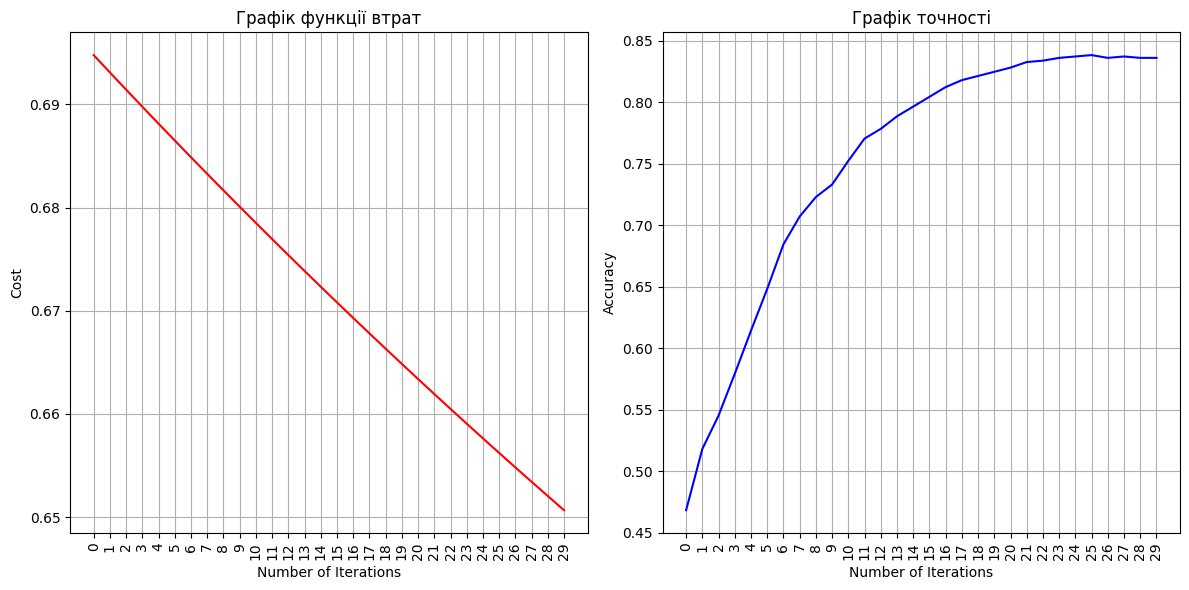

Train accuracy: 83.82 %
Test accuracy: 81.88 %


In [23]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 30)

5.	Підтвердити розрахунки за допомогою логістичної регресії (модель класичного машинного навчання).

In [24]:
cor_matrix = df.corr()
cor_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


In [25]:
cor_with_class = cor_matrix['DEATH_EVENT'].sort_values(ascending=False)
cor_with_class

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.290229
age,0.224602
high_blood_pressure,0.113721
anaemia,0.063510
creatinine_phosphokinase,0.055221
sex,0.044045
smoking,0.006774
diabetes,-0.001485
platelets,-0.044523


In [27]:
# Групування даних за DEATH_EVENT та обчислення середньої кількості курців
mean_absences = df.groupby('DEATH_EVENT')['smoking'].mean()

mean_absences

,smoking
DEATH_EVENT,
0,0.305525
1,0.312343


In [ ]:
mean_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean()
mean_gpa_by_support

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
df1 = df

X = df1.drop(columns='DEATH_EVENT')
y = df1['DEATH_EVENT']

In [31]:
cat_features = [col for col in X if df[col].nunique() < 25]
cont_features = [col for col in X if df[col].nunique() >= 25]

print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 6
Categorical features: ['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking'] 

Number of continuous features: 6
Continuous features: ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 



In [32]:
categorical_features = ['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking']
numeric_features = ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Точність моделі Random Forest: {accuracy_rf:.4f}")

Точність моделі Random Forest: 0.9520


In [34]:
# Створення конвеєра для логістичної регресії
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=200))
])

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Точність моделі Logistic Regression: {accuracy_log_reg:.4f}")

Точність моделі Logistic Regression: 0.8510


6.	Вивести метрики.
Порівняти результати.

In [35]:
print("Номер пацієнта | Справжнє значення | Прогнозоване (Random Forest) | Прогнозоване (Logistic Regression)")

# Отримання перших 10 студентів
for i, index in enumerate(X_test.index[:10]):
    true_value = y_test.iloc[i]
    pred_rf = y_pred_rf[i]
    pred_log_reg = y_pred_log_reg[i]  # Виправлено ім'я змінної

    # Виведення результатів
    print(f"Пацієнт {index} | Справжнє: {true_value} | RF: {pred_rf} | Log_regr: {pred_log_reg}")

Номер пацієнта | Справжнє значення | Прогнозоване (Random Forest) | Прогнозоване (Logistic Regression)
Пацієнт 854 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 876 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 758 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 50 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 3460 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 596 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 679 | Справжнє: 1 | RF: 1 | Log_regr: 1
Пацієнт 1236 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 83 | Справжнє: 0 | RF: 0 | Log_regr: 0
Пацієнт 619 | Справжнє: 1 | RF: 1 | Log_regr: 1


7.	Написати висновки.

Висновок: У данному завданні було розглянуто використання та побудову моделей з використанням логістичної регресії. Було побудовано логістичну регресію для аналізу датасета "hearts.csv" та встановлення кореляції летальних випадків у пацієнтів з іншимими даними датасету. Дослідження вказало на ефективність використання моделей логістичної регресії при аналізі даних.